In [65]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
import requests
import cpi
from datetime import datetime

# Converting prices to returns 

- Simple returns : $R_t = \displaystyle \frac{P_t - P_{t-1}}{P_{t-1}}$

- Log returns : $r_t = \log ( \displaystyle \frac{P_t}{P_{t-1}})$ 

$P_t$ is the price of an asset in time $t$.

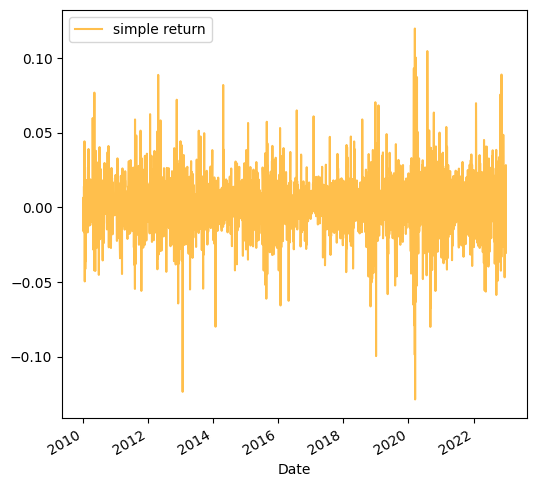

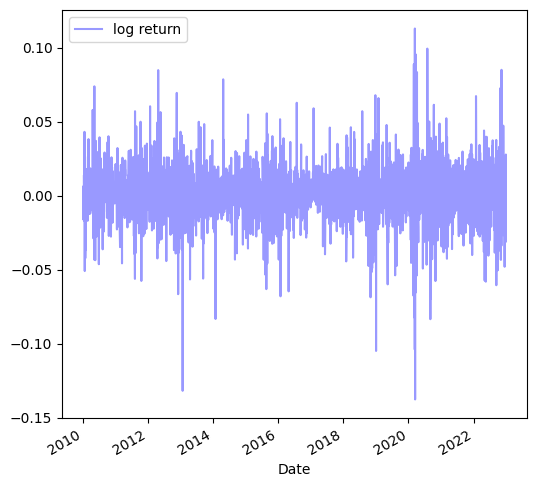

In [51]:
# download Apple's stock prices and calculate simple/log returns
df = yf.download("AAPL",
                 start = "2010-01-01",
                 end = "2023-01-01",
                 progress = False)

# simple return
df["simple_return"] = df["Adj Close"].pct_change()
df["log_return"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))

plt.figure(figsize=(6,6))
df["simple_return"].plot(label = "simple return", color = "orange", alpha = 0.7)
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
df["log_return"].plot(label = "log return", color = "blue", alpha = 0.4)
plt.legend()
plt.show()

# Adjusting the returns for inflation 

$ R_t ^r = \displaystyle \frac{1 + R_t}{1 + \pi _t} - 1 $

In [ ]:
# using cpi 

# update cpi
#cpi.update()


cpi_series = cpi.series.get()
df_cpi = cpi_series.to_dataframe()
df_cpi = df_cpi.query("period_type == 'monthly' and year >= 2010").loc[:,["date", "value"]].set_index("date")[:"2023-01-01"]

df["inflation_rate"] = df["cpi"].pct_change()
df["real_return"] = (1 + df["simple_return"]) / (1 + df["inflation_rate"]) - 1
